In [3]:
import numpy as np
import sympy as sym
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy as sci
from scipy.signal import find_peaks, peak_widths
from scipy.special import wofz
from scipy.optimize import curve_fit
from scipy.constants import e
from scipy.constants import c
from scipy.constants import h


In [4]:
def Error(valor_principal, incertidumbre):
    # Determinar cuántas cifras significativas tiene la incertidumbre
    if incertidumbre == 0:
        return valor_principal, incertidumbre  # Evita la división por cero
    
    cifras_significativas = -int(math.floor(math.log10(incertidumbre)))
    
    # Redondear el valor principal y la incertidumbre a esas cifras significativas
    valor_redondeado = round(valor_principal, cifras_significativas)
    incertidumbre_redondeada = round(incertidumbre, cifras_significativas)
    
    return valor_redondeado, incertidumbre_redondeada


def Computation_Error(expression, symbols, parameters):
    error_2 = 0.
    ward = int((len(symbols)/2))
    func_value = sym.lambdify(symbols[0:ward], expression)
    value = func_value(*parameters[0:ward])

    for i in range(0, len(symbols[0:ward])):
        unc_ward = ward + i
        error_2 += sym.diff(expression, symbols[i])**2 * (symbols[unc_ward])**2

    func_error_2 = sym.lambdify(symbols, error_2)
    value_error_2 = func_error_2(*parameters)
    
    error = np.sqrt(value_error_2)
    
    value, error = Error(value, error)
    
    return value, error

# Actividad 1
Intensidad es un función del angulo, para ver las lineas caracteristicas del espectro

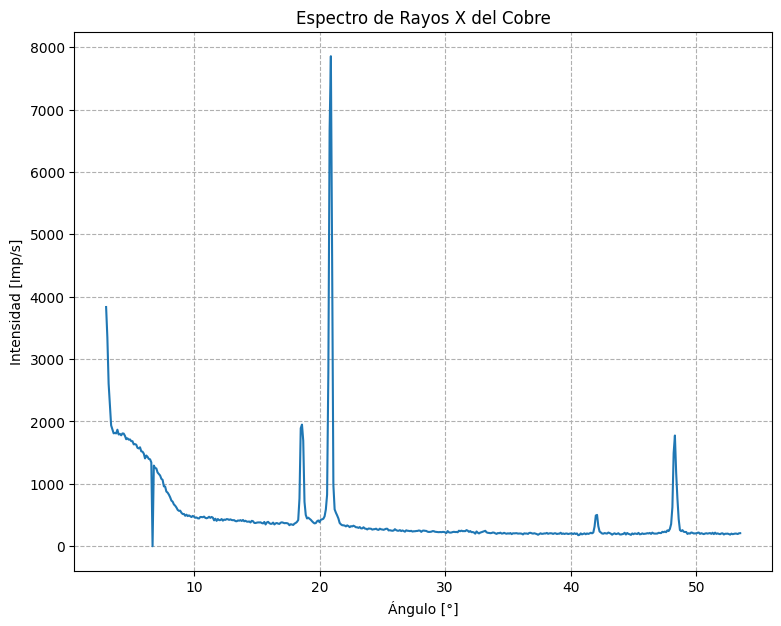

In [3]:
Cu_angulos= np.arange(3.0,53.6,0.1)
Cu_intensidad= np.array([3835, 3347, 2607, 2280, 1938, 1871, 1810, 1816, 1809, 1868, 1791, 1801, 1778, 1808, 1806, 1770, 1715, 1730, 1709, 1712, 1685, 1684, 1633, 1637, 1628, 1577, 1568, 1586, 1522, 1516, 1485, 1408, 1454, 1433, 1400, 1394, 1344, 0, 1293, 1254, 1247, 1182, 1159, 1134, 1081, 1064, 960, 957, 877, 859, 827, 785, 732, 714, 670, 650, 621, 583, 567, 570, 536, 516, 517, 488, 506, 483, 494, 481, 468, 486, 474, 457, 462, 448, 445, 469, 468, 465, 475, 455, 448, 456, 472, 455, 469, 458, 415, 441, 407, 436, 418, 419, 436, 410, 427, 422, 435, 432, 422, 431, 420, 417, 418, 403, 400, 413, 409, 418, 405, 421, 400, 408, 395, 393, 397, 381, 407, 401, 374, 372, 378, 382, 381, 383, 371, 366, 389, 349, 381, 391, 370, 359, 360, 379, 349, 366, 372, 362, 358, 377, 383, 377, 369, 371, 370, 362, 337, 353, 348, 341, 362, 373, 390, 420, 764, 1892, 1950, 1691, 712, 502, 445, 457, 440, 424, 401, 381, 366, 371, 400, 413, 385, 426, 431, 440, 479, 589, 826, 2799, 6663, 7856, 4629, 982, 591, 538, 494, 445, 373, 351, 337, 335, 331, 318, 334, 323, 306, 322, 317, 329, 318, 304, 303, 294, 307, 286, 286, 304, 284, 280, 269, 284, 282, 280, 266, 272, 274, 281, 266, 262, 281, 271, 268, 263, 272, 280, 280, 253, 257, 251, 248, 252, 273, 258, 249, 248, 258, 243, 253, 244, 233, 255, 248, 246, 242, 247, 235, 240, 240, 244, 245, 252, 249, 230, 248, 251, 247, 245, 233, 229, 230, 233, 242, 241, 232, 229, 227, 225, 228, 225, 229, 229, 222, 211, 243, 223, 218, 220, 227, 231, 227, 229, 224, 249, 240, 250, 241, 243, 241, 258, 249, 230, 243, 225, 227, 220, 201, 237, 217, 205, 219, 225, 233, 240, 247, 223, 215, 213, 209, 212, 220, 217, 206, 198, 211, 208, 217, 203, 205, 215, 205, 200, 207, 202, 211, 194, 207, 206, 207, 209, 202, 204, 204, 201, 189, 207, 203, 204, 197, 213, 215, 207, 202, 208, 201, 195, 184, 196, 207, 198, 200, 205, 204, 213, 199, 206, 208, 206, 197, 207, 207, 196, 201, 201, 216, 197, 205, 196, 203, 204, 195, 201, 204, 204, 195, 208, 196, 205, 177, 182, 206, 190, 198, 206, 192, 205, 197, 205, 216, 207, 219, 313, 492, 502, 322, 237, 221, 204, 201, 211, 206, 203, 219, 211, 201, 185, 199, 207, 194, 199, 208, 190, 188, 193, 198, 216, 187, 212, 198, 192, 182, 205, 193, 205, 200, 196, 214, 191, 194, 206, 197, 200, 202, 209, 205, 213, 197, 218, 205, 202, 203, 203, 215, 213, 210, 231, 225, 235, 225, 254, 243, 277, 356, 627, 1494, 1775, 1176, 764, 436, 260, 242, 258, 232, 228, 228, 197, 209, 202, 220, 215, 204, 206, 205, 215, 219, 198, 209, 201, 194, 203, 208, 202, 207, 211, 198, 216, 194, 218, 198, 206, 198, 193, 205, 207, 188, 200, 200, 202, 195, 186, 202, 193, 198, 203, 202, 195, 207, 209])

plt.figure(figsize = (9, 7))
plt.plot(Cu_angulos, Cu_intensidad)
plt.ylabel("Intensidad [Imp/s]")
plt.title("Espectro de Rayos X del Cobre")
plt.xlabel("Ángulo [°]")
plt.grid(True,linestyle="--")

Debemos pasar a longitud de onda ($\lambda$) a traves de la ley de bragg

$n\lambda = \frac{2d sin(\theta)}{m}$

Con los valores de $m=1$ y $d= 2.014\times 10^{-10}m$ y tomando solo la parte del espectro donde se encuentran las lineal espectrales ($n=1$ y $n=2$)


In [8]:
#Paso a longitud de onda 
d= 2.014
fase= -1.7

n1_x= []
n1_y=[]
n2_x=[]
n2_y=[]

for i in range (0,len(Cu_angulos)):
    if 17<=Cu_angulos[i] <=22:
        n1_x.append(2*d*np.sin(np.radians(Cu_angulos[i]-fase)))
        n1_y.append(Cu_intensidad[i])

    if 38<= Cu_angulos[i] <=52:
        n2_x.append(2*d*np.sin(np.radians(Cu_angulos[i]-fase))/2)
        n2_y.append(Cu_intensidad[i])


NameError: name 'Cu_angulos' is not defined

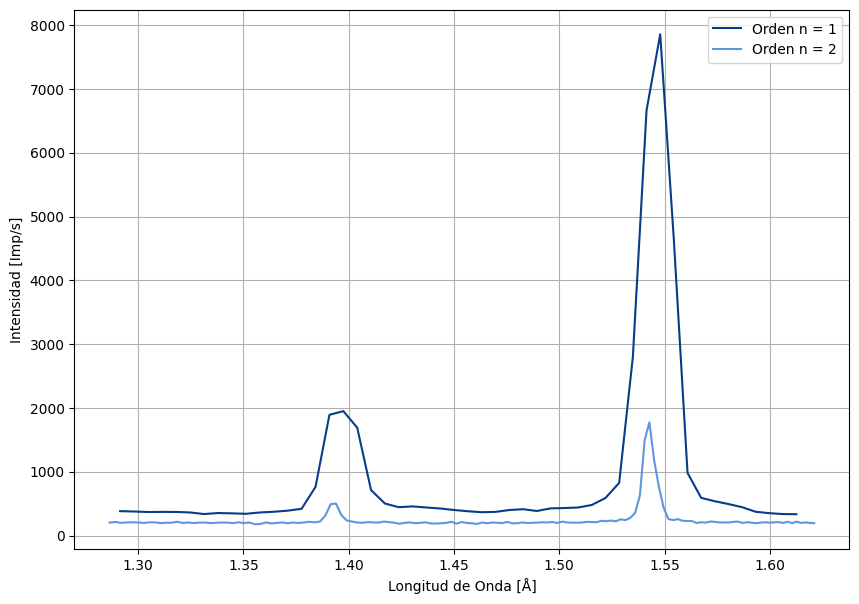

In [5]:
plt.figure(figsize = (10, 7))
plt.plot(n1_x, n1_y, color = "#083c87", label = "Orden n = 1")
plt.plot(n2_x, n2_y, color = "#6095e2", label = "Orden n = 2")
plt.xlabel("Longitud de Onda [Å]")
plt.ylabel("Intensidad [Imp/s]")
plt.legend()
plt.grid()
plt.show()

# Ajuste lorentziano y perfil de Voight 
Debemos realizar estos ajustes para ambos ordenes del espectro 

In [64]:
#Selecciónamos cada pico 

#kb n1
n1b_L = []
n1b_Ly  = []

#Ka n1
n1a_L = []
n1a_Ly = []

#Kb n2
n2b_L = []
n2b_Ly = []

#ka n2
n2a_L = []
n2a_Ly = []

for i in range(0, len(n1_x)):
    if 1.37<= n1_x[i] <= 1.45:
        n1b_L.append(n1_x[i])
        n1b_Ly.append(n1_y[i])
    if 1.45<= n1_x[i] <= 1.60:
        n1a_L.append(n1_x[i])
        n1a_Ly.append(n1_y[i])

for i in range(0, len(n2_x)):

    if 1.38<= n2_x[i] <= 1.41:
        n2b_L.append(n2_x[i])
        n2b_Ly.append(n2_y[i])
    if 1.43<= n2_x[i] <= 1.56:
        n2a_L.append(n2_x[i])
        n2a_Ly.append(n2_y[i])


In [7]:
def Lorentzian(x, h, x0, W):
 return h*(W**2)/(((x-x0)**2) + (W**2))

In [8]:
#Ajuste lorentzianos picos n=1

Lparams1b,cov_n1b = curve_fit(Lorentzian,n1b_L,n1b_Ly)
cov_n1b= np.sqrt(np.diag(cov_n1b))

n1b_L_= np.linspace(np.min(n1_x),np.max(n1b_L))

Lparams1a,cov_n1a = curve_fit(Lorentzian,n1a_L,n1a_Ly)
cov_n1a= np.sqrt(np.diag(cov_n1a))

n1a_L_= np.linspace(np.min(n1a_L),np.max(n1_x))

#Residuales n=1
res_n1b_L= n1b_Ly- Lorentzian(n1b_L, *Lparams1b)
res_n1a_L = n1a_Ly - Lorentzian(n1a_L, *Lparams1a)

#Ajustes lorentzianos picos n=2

Lparams2b,cov_n2b = curve_fit(Lorentzian,n2b_L,n2b_Ly)
cov_n2b= np.sqrt(np.diag(cov_n2b))

n2b_L_= np.linspace(np.min(n2_x),np.max(n2b_L))

Lparams2a,cov_n2a = curve_fit(Lorentzian,n2a_L,n2a_Ly)
cov_n2a= np.sqrt(np.diag(cov_n2a))

n2a_L_= np.linspace(np.min(n2a_L),np.max(n2_x))

#Residuales n=2

ward = int(round(len(n2_y)/2,0))

res_n2b_L = n2_y[0:ward] - Lorentzian(n2_x[0:ward], *Lparams2b)
res_n2a_L = n2_y[ward:] - Lorentzian(n2_x[ward:], *Lparams2a)





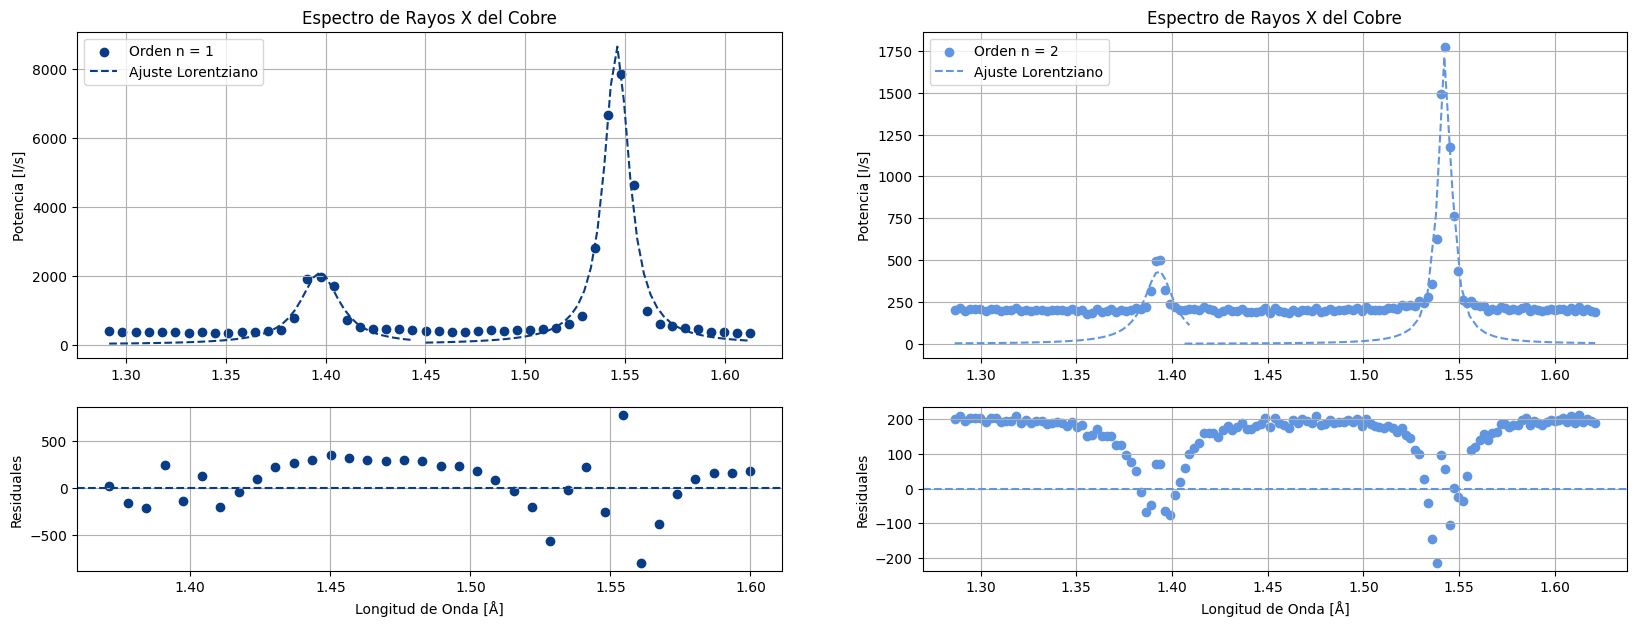

In [9]:
figure, axis = plt.subplots(2, 2, figsize = (20, 7), gridspec_kw={'height_ratios': [2, 1]})
#Ajuste n=1
axis[0, 0].scatter(n1_x, n1_y, color = "#083c87", label = "Orden n = 1")
axis[0, 0].plot(n1b_L_, Lorentzian(n1b_L_, *Lparams1b), color = "#083c87", linestyle = "--")
axis[0, 0].plot(n1a_L_, Lorentzian(n1a_L_, *Lparams1a), color = "#083c87", linestyle = "--", label = "Ajuste Lorentziano")
axis[1, 0].set_xlabel("Longitud de Onda [Å]")
axis[0, 0].set_ylabel("Potencia [I/s]")
axis[0, 0].set_title("Espectro de Rayos X del Cobre")
axis[0, 0].legend()
axis[0, 0].grid()

#Residuos n=1
axis[1, 0].scatter(n1b_L, res_n1b_L, color = "#083c87")
axis[1, 0].scatter(n1a_L, res_n1a_L, color = "#083c87")
axis[1, 0].set_ylabel("Residuales")
axis[1, 0].axhline(y = 0, color = "#083c87", linestyle = "--")
axis[1, 0].grid()


#Ajuste n=2

axis[0, 1].scatter(n2_x, n2_y, color = "#6095e2", label = "Orden n = 2")
axis[0, 1].plot(n2b_L_, Lorentzian(n2b_L_, *Lparams2b), color = "#6095e2", linestyle = "--")
axis[0, 1].plot(n2a_L_, Lorentzian(n2a_L_, *Lparams2a), color = "#6095e2", linestyle = "--", label = "Ajuste Lorentziano")
axis[1, 1].set_xlabel("Longitud de Onda [Å]")
axis[0, 1].set_ylabel("Potencia [I/s]")
axis[0, 1].set_title("Espectro de Rayos X del Cobre")
axis[0, 1].legend()
axis[0, 1].grid()

#Residuales n=2

axis[1, 1].scatter(n2_x[0:ward], res_n2b_L, color = "#6095e2")
axis[1, 1].scatter(n2_x[ward:], res_n2a_L, color = "#6095e2")
axis[1, 1].set_ylabel("Residuales")
axis[1, 1].axhline(y = 0, color = "#6095e2", linestyle = "--")
axis[1, 1].grid()






In [69]:
#Hayamos los picos de los ajuste y el error asociado

n1_bL = Error(Lparams1b[1], cov_n1b[1])
n1_aL = Error(Lparams1a[1], cov_n1a[1])
n2_bL = Error(Lparams2b[1], cov_n2b[1])
n2_aL = Error(Lparams2a[1], cov_n2a[1])

print(r'Lorentziana: La longitud de onda de $K_\alpha$ es {} $\pm$ {} y de $K_\beta$ es {} $\pm$ {} Å para el orden $n = 1$. Para el orden $n = 2$, la longitud de onda de  $K_\alpha$ es {} $\pm$ {} y de $K_\beta$ es {} $\pm$ {} Å.'.format(n1_aL[0], n1_aL[1], n1_bL[0], n1_bL[1], n2_aL[0], n2_aL[1], n2_bL[0], n2_bL[1]))

Lorentziana: La longitud de onda de $K_\alpha$ es 1.5459 $\pm$ 0.0003 y de $K_\beta$ es 1.397 $\pm$ 0.001 Å para el orden $n = 1$. Para el orden $n = 2$, la longitud de onda de  $K_\alpha$ es 1.5426 $\pm$ 0.0004 y de $K_\beta$ es 1.3931 $\pm$ 0.0009 Å.


## Perfil de Voight

In [24]:
def Gauss(x, y0, a, x0, sigma):
 return y0 + a*np.exp(-((x - x0)**2)/(2*(sigma**2)))

def Voigt(x, amplitude, center, sigma, gamma):
    z = ((x - center) + 1j*gamma)/(sigma*np.sqrt(2))
    v = amplitude*wofz(z).real/(sigma*np.sqrt(2*np.pi))
    return v

In [86]:
#Ajuste voight picos n=1

Vparams1b,Vcov_n1b = curve_fit(Voigt,n1b_L,n1b_Ly, p0 = [np.max(n1b_Ly), np.mean(n1b_L), np.std(n1b_L), np.std(n1b_L)/2])
Vcov_n1b = np.sqrt(np.diag(np.abs(Vcov_n1b)))
n1b_V_= np.linspace(np.min(n1_x),np.max(n1b_L),1000)

Res_n1b_V= n1b_Ly - Voigt(n1b_L, *Vparams1b)

Vparams1a,Vcov_n1a = curve_fit(Voigt,n1a_L,n1a_Ly, p0 = [np.max(n1a_Ly), np.mean(n1a_L), np.std(n1a_L), np.std(n1a_L)/2])
Vcov_n1a = np.sqrt(np.diag(np.abs(Vcov_n1a)))
n1a_V_= np.linspace(np.min(n1a_L),np.max(n1_x),1000)

Res_n1a_V= n1a_Ly - Voigt(n1a_L, *Vparams1a)

#Ajuste voight picos n=2

Vparams2b,Vcov_n2b = curve_fit(Voigt,n2b_L,n2b_Ly, p0 = [np.max(n2b_Ly), np.mean(n2b_L), np.std(n2b_L), np.std(n2b_L)/2])
Vcov_n2b = np.sqrt(np.diag(np.abs(Vcov_n2b)))
n2b_V_= np.linspace(np.min(n2_x),np.max(n2b_L),1000)

Res_n2b_V= n2b_Ly - Voigt(n2b_L, *Vparams2b)

Vparams2a,Vcov_n2a = curve_fit(Voigt,n2a_L,n2a_Ly, p0 = [np.max(n2a_Ly), np.mean(n2a_L), np.std(n2a_L), np.std(n2a_L)/2])
Vcov_n2a = np.sqrt(np.diag(np.abs(Vcov_n2a)))
n2a_V_= np.linspace(np.min(n2a_L),np.max(n2_x),1000)

Res_n2a_V= n2a_Ly - Voigt(n2a_L, *Vparams2a)



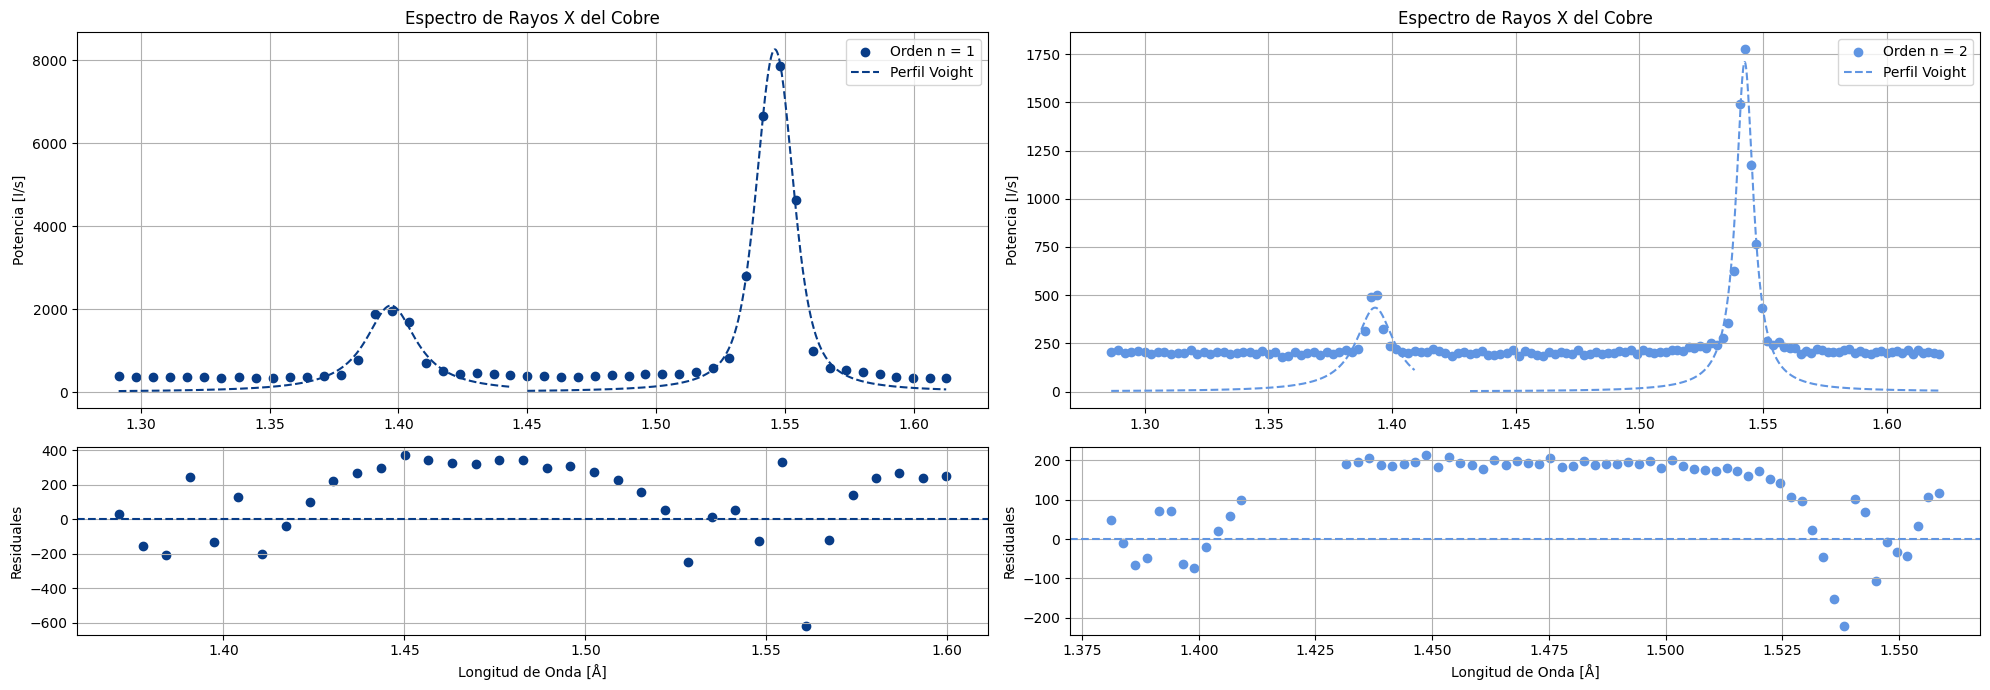

In [67]:
fig, axis = plt.subplots(2, 2, figsize=(20, 7), gridspec_kw={'height_ratios': [2, 1]})

#Ajuste n=1
axis[0, 0].scatter(n1_x, n1_y, color="#083c87", label="Orden n = 1")
axis[0,0].plot(n1b_V_, Voigt(n1b_V_, *Vparams1b), color = "#083c87", linestyle = "--")
axis[0,0].plot(n1a_V_, Voigt(n1a_V_, *Vparams1a), color = "#083c87", linestyle = "--", label="Perfil Voight")
axis[0, 0].set_ylabel("Potencia [I/s]")
axis[0, 0].set_title("Espectro de Rayos X del Cobre")
axis[0, 0].legend()
axis[0, 0].grid()


# Residuales n=1
axis[1, 0].scatter(n1b_L, Res_n1b_V, color = "#083c87")
axis[1, 0].scatter(n1a_L, Res_n1a_V, color = "#083c87")
axis[1, 0].set_ylabel("Residuales")
axis[1, 0].axhline(y = 0, color = "#083c87", linestyle = "--")
axis[1, 0].grid()
axis[1, 0].set_xlabel("Longitud de Onda [Å]")

#Ajuste n=2
axis[0, 1].scatter(n2_x, n2_y, color = "#6095e2", label = "Orden n = 2")
axis[0, 1].plot(n2b_V_, Voigt(n2b_V_, *Vparams2b), color = "#6095e2", linestyle = "--")
axis[0, 1].plot(n2a_V_, Voigt(n2a_V_, *Vparams2a), color = "#6095e2", linestyle = "--", label = "Perfil Voight")
axis[1, 1].set_xlabel("Longitud de Onda [Å]")
axis[0, 1].set_ylabel("Potencia [I/s]")
axis[0, 1].set_title("Espectro de Rayos X del Cobre")
axis[0, 1].legend()
axis[0, 1].grid()


#Residuales n=2
# Residuales n=1
axis[1, 1].scatter(n2b_L, Res_n2b_V, color = "#6095e2")
axis[1, 1].scatter(n2a_L, Res_n2a_V, color = "#6095e2")
axis[1, 1].set_ylabel("Residuales")
axis[1, 1].axhline(y = 0, color = "#6095e2", linestyle = "--")
axis[1, 1].grid()
axis[1, 1].set_xlabel("Longitud de Onda [Å]")

plt.tight_layout()
plt.show()



In [87]:
Vcov_n2a

array([1.95973865e+00, 3.60640165e-04, 5.31955904e-03, 5.32061208e-04])

### Resultados mas impresisos

In [88]:
# Calculo de los picos 
n1_bV = Error(Vparams1b[1], Vcov_n1b[1])
n1_aV = Error(Vparams1a[1], Vcov_n1a[1])
n2_bV = Error(Vparams2b[1], Vcov_n2b[1])
n2_aV = Error(Vparams2a[1], Vcov_n2a[1])

print(r'Perfil Voight: La longitud de onda de $K_\alpha$ es {} $\pm$ {} y de VK_\beta$ es {} $\pm$ {} Å para el orden $n = 1$. Para el orden $n = 2$, la longitud de onda de  $K_\alpha$ es {} $\pm$ {} y de $K_\beta$ es {} $\pm$ {} Å.'.format(n1_aV[0], n1_aV[1], n1_bV[0], n1_bV[1], n2_aV[0], n2_aV[1], n2_bV[0], n2_bV[1]))

Perfil Voight: La longitud de onda de $K_\alpha$ es 1.5461 $\pm$ 0.0003 y de VK_\beta$ es 1.397 $\pm$ 0.001 Å para el orden $n = 1$. Para el orden $n = 2$, la longitud de onda de  $K_\alpha$ es 1.5426 $\pm$ 0.0004 y de $K_\beta$ es 1.393 $\pm$ 0.001 Å.


# Energías 

In [ ]:
h_, c_, wave, unc_h, unc_c, unc_wave = sym.symbols("h, c, lambda, sigma_h, sigma_c, sigma_lambda", real = True)

energy_exp = h_*c_/(wave*1e-10) * (1/(1.602176565e-19)) * (1e-3)
energy_sym = h_, c_, wave, unc_h, unc_c, unc_wave

waves = [(n1_aL[0], n1_aL[1]), (n1_bL[0], n1_bL[1]), (n2_aL[0], n2_aL[1]), (n2_bL[0], n2_bL[1])]
energies = []
for i in waves:
    energy_param = (h, c, i[0], 0, 0, i[1])

    energy, energy_error = Computation_Error(energy_exp, energy_sym, energy_param)
    energies.append((energy, energy_error))

print(r'La energía asociada a la longitud de onda de $K_\alpha$ es de {} $\pm$ {} keV, la de la línea $K_\beta$ es de {} $\pm$ {} keV. Esto para el orden $n = 1$. Para el orden $n = 2$, la energía de la línea $K_\alpha$ es de {} $\pm$ {} keV, y la línea $K_\beta$ es de {} $\pm$ {} keV.'.format(energies[0][0], energies[0][1], energies[1][0], energies[1][1], energies[2][0], energies[2][1], energies[3][0], energies[3][1]))

La energía asociada a la longitud de onda de $K_\alpha$ es de 8.02 $\pm$ 0.002 keV, la de la línea $K_\beta$ es de 8.875 $\pm$ 0.006 keV. Esto para el orden $n = 1$. Para el orden $n = 2$, la energía de la línea $K_\alpha$ es de 8.037 $\pm$ 0.002 keV, y la línea $K_\beta$ es de 8.9 $\pm$ 0.006 keV.


# Actividad 2

In [5]:
def SetWave(array, d, phase):
    array_ = array.copy()
    for i in range(0, len(array)):
        array_[i] = 2*d*np.sin(np.radians(array[i] - phase))
    return array_

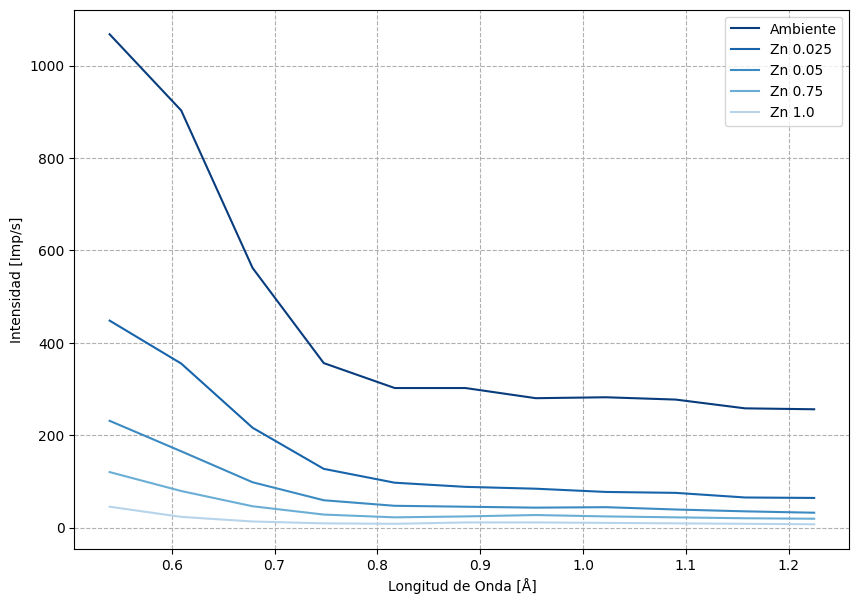

In [27]:
#Data
d= 2.014
fase= -1.7
angle= np.arange(6,17,1)
ambiente=  np.array([1068, 903, 562, 356, 302, 302, 280, 282, 277, 258, 256])
zn_0025 = np.array([448, 355, 216, 127, 97, 88, 84, 77, 75, 65, 64])
zn_005= np.array([231, 165, 98, 59, 47, 45, 43, 44, 39, 35, 32])
zn_075 = np.array([120, 79, 46, 28, 22, 24, 27, 24, 22, 20, 19])
zn_01= np.array([45, 23, 13, 9, 8, 11, 11, 10, 9, 8, 7])



w= []

for i in range (0,len(angle)):
        w.append(2*d*np.sin(np.radians(angle[i]-fase)))

colores = plt.cm.Blues([0.3, 0.5, 0.65, 0.8, 0.95])

plt.figure(figsize=(10,7))
plt.plot(w, ambiente, color=colores[4], label="Ambiente")
plt.plot(w, zn_0025, color=colores[3], label="Zn 0.025")
plt.plot(w, zn_005, color=colores[2], label="Zn 0.05")
plt.plot(w, zn_075, color=colores[1], label="Zn 0.75")
plt.plot(w, zn_01, color=colores[0], label="Zn 1.0")
plt.xlabel("Longitud de Onda [Å]")
plt.ylabel("Intensidad [Imp/s]")
plt.legend()
plt.grid(linestyle= "--")
plt.show()

-30197.27259764157
-35785.473655855276
-36749.25292315883
-34744.88158795192
-32979.65381249636
-27467.733111181795
-26256.511327285498


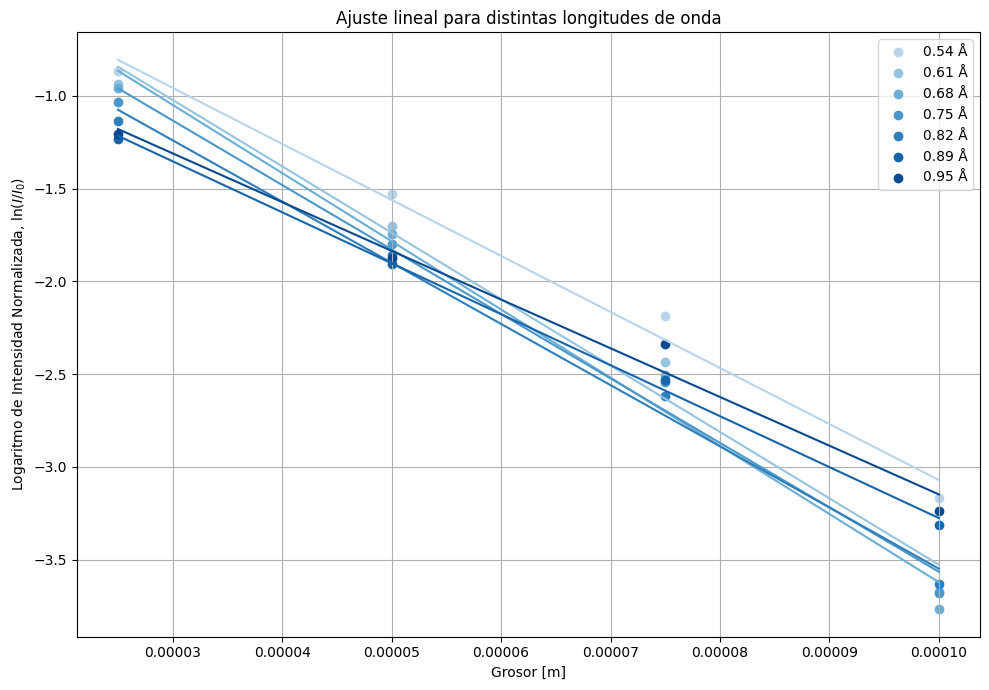

In [37]:

# --- Datos dados ---
d = 2.014
fase = -1.7
angle = np.arange(6, 13, 1)

ambiente = np.array([1068, 903, 562, 356, 302, 302, 280])
zn_0025 = np.array([448, 355, 216, 127, 97, 88, 84])
zn_005 = np.array([231, 165, 98, 59, 47, 45, 43])
zn_075 = np.array([120, 79, 46, 28, 22, 24, 27])
zn_01 = np.array([45, 23, 13, 9, 8, 11, 11])

# --- Cálculo de longitudes de onda ---
w = 2 * d * np.sin(np.radians(angle - fase))

# --- Datos organizados ---
Zn_Intens = [zn_0025, zn_005, zn_075, zn_01]
Zn_Labels = ["0.025mm", "0.05mm", "0.075mm", "0.1mm"]
Abs_grossor = np.array([0.025, 0.05, 0.075, 0.1]) / 1000  # en metros

# --- Función lineal para ajuste ---
def Linear(x, m, b):
    return m * x + b

# --- Inicializar lista para resultados ---
Absortion = []

# Calcular absorción para cada longitud de onda
for j in range(len(w)):
    fila = []
    for i in range(len(Zn_Intens)):
        fila.append(np.log(Zn_Intens[i][j] / ambiente[j]))  # ln(I/I0)
    Absortion.append(fila)

# --- Graficar ---
plt.figure(figsize=(10, 7))

Abs_Mu_all = []
Zn_Colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(w)))

for count, data in enumerate(Absortion):
    data = np.array(data)
    ZnLin_var, ZnLin_unc = curve_fit(Linear, Abs_grossor, data)
    print(ZnLin_var[0])
    ZnLin_unc = np.sqrt(np.diag(ZnLin_unc))

    Abs_grossor_fit = np.linspace(min(Abs_grossor), max(Abs_grossor), 100)

    plt.scatter(Abs_grossor, data, color=Zn_Colors[count], label=str(np.round(w[count], 2)) + " Å")
    plt.plot(Abs_grossor_fit, Linear(Abs_grossor_fit, *ZnLin_var), color=Zn_Colors[count])

    Abs_Mu_all.append((np.abs(ZnLin_var[0]), ZnLin_unc[0]))

Abs_Mu_all = np.array(Abs_Mu_all)

# --- Estética de la gráfica ---
plt.xlabel("Grosor [m]")
plt.ylabel(r"Logaritmo de Intensidad Normalizada, $\ln(I/I_0)$")
plt.title("Ajuste lineal para distintas longitudes de onda")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



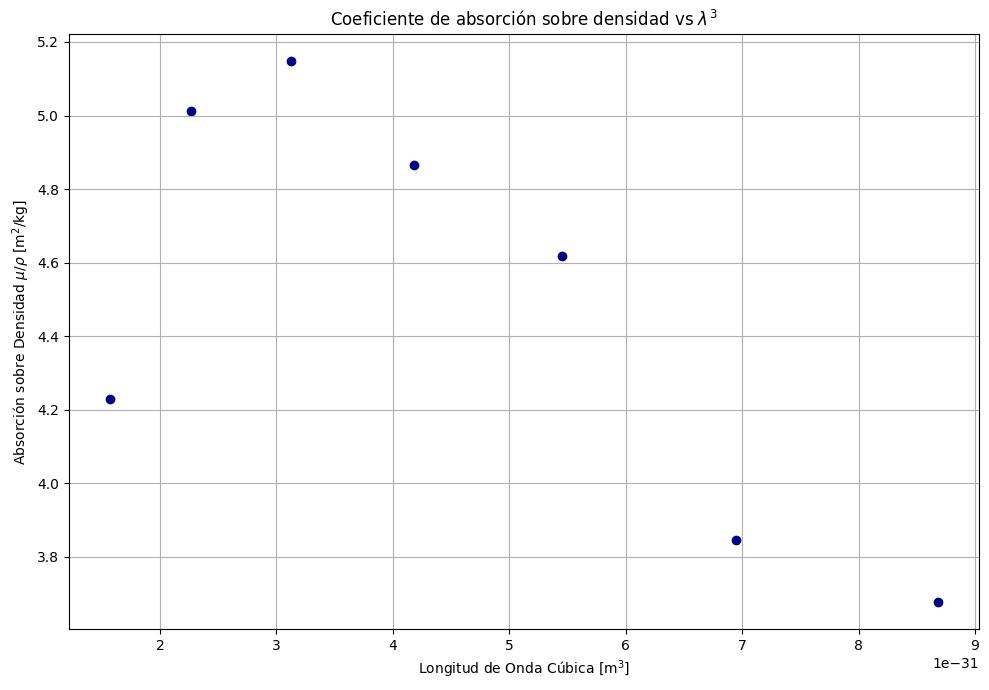

In [34]:
# --- Asumimos densidad del Zinc ---
rho_Zn = 7140  # kg/m³

# --- Separar los valores de μ y su incertidumbre ---
Abs_Mu = []
Abs_Mu_unc = []

for mu, unc in Abs_Mu_all:
    Abs_Mu.append(mu)
    Abs_Mu_unc.append(unc)

Abs_Mu = np.array(Abs_Mu)
Abs_Mu_unc = np.array(Abs_Mu_unc)

# --- Cálculo de μ/ρ ---
Abs_Rhu = Abs_Mu / rho_Zn

# --- Longitud de onda al cubo (en m^3) ---
w_metros = w * 1e-10  # Convertir Å a m
Abs_X = w_metros**3

# --- Gráfica ---
plt.figure(figsize=(10, 7))
plt.scatter(Abs_X, Abs_Rhu, color='navy')
plt.xlabel(r"Longitud de Onda Cúbica [m$^3$]")
plt.ylabel(r"Absorción sobre Densidad $\mu/\rho$ [m$^{2}$/kg]")
plt.title(r"Coeficiente de absorción sobre densidad vs $\lambda^3$")
plt.grid(True)
plt.tight_layout()
plt.show()


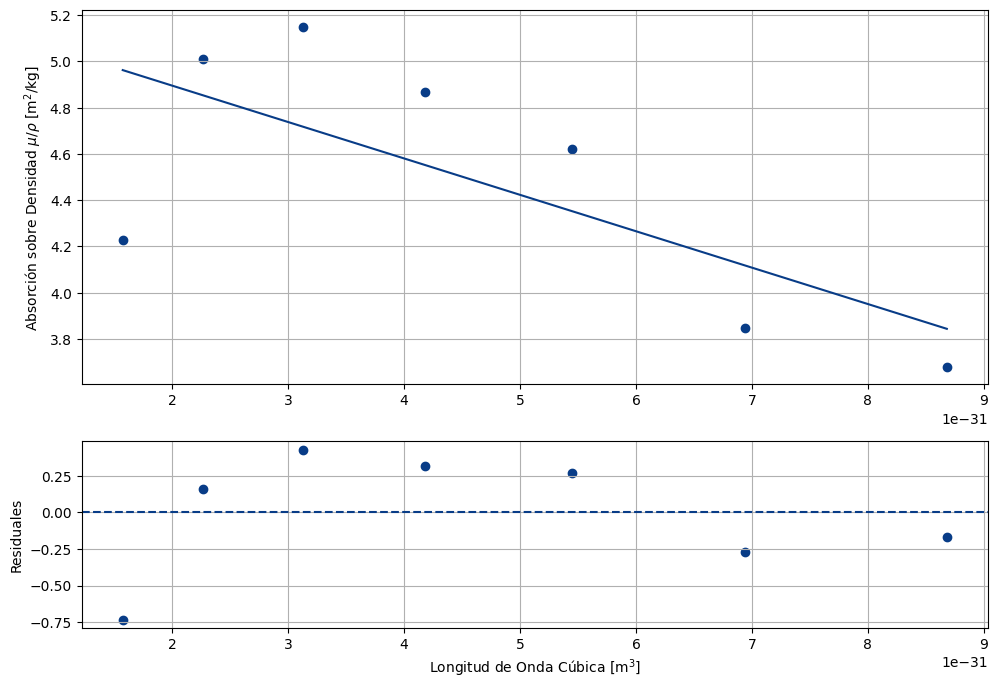

In [40]:
# --- Usamos Abs_Wave como el eje x ---
Abs_Wave = Abs_X

# --- Ajuste lineal con incertidumbre ---
AbsReg_var, AbsReg_unc = np.polyfit(Abs_Wave, Abs_Rhu, 1, cov=True)
AbsReg_unc = np.sqrt(np.diag(AbsReg_unc))

# --- Datos para graficar la línea ajustada ---
AbsReg_Wave_ = np.linspace(min(Abs_Wave), max(Abs_Wave), 1000)
AbsReg_Error = Abs_Rhu - Linear(Abs_Wave, *AbsReg_var)

# --- Gráfica con residuales ---
fig, axis = plt.subplots(2, 1, figsize=(10, 7), gridspec_kw={'height_ratios': [2, 1]})

# Gráfico principal
axis[0].scatter(Abs_Wave, Abs_Rhu, color="#083c87", label='Datos')
axis[0].plot(AbsReg_Wave_, Linear(AbsReg_Wave_, *AbsReg_var), color="#083c87", label='Ajuste lineal')
axis[0].set_ylabel(r"Absorción sobre Densidad $\mu/\rho$ [m$^{2}$/kg]")
axis[0].grid(True)

# Residuales
axis[1].axhline(y=0, color="#083c87", linestyle="--")
axis[1].scatter(Abs_Wave, AbsReg_Error, color="#083c87")
axis[1].set_xlabel(r"Longitud de Onda Cúbica [m$^3$]")
axis[1].set_ylabel("Residuales")
axis[1].grid(True)

plt.tight_layout()
plt.show()


In [38]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# --- Datos dados ---
d = 2.014
fase = -1.7
angle = np.arange(6, 13, 1)

ambiente = np.array([1068, 903, 562, 356, 302, 302, 280])
zn_0025 = np.array([448, 355, 216, 127, 97, 88, 84])
zn_005 = np.array([231, 165, 98, 59, 47, 45, 43])
zn_075 = np.array([120, 79, 46, 28, 22, 24, 27])
zn_01 = np.array([45, 23, 13, 9, 8, 11, 11])

# --- Cálculo de longitudes de onda ---
w = 2 * d * np.sin(np.radians(angle - fase))

# --- Datos organizados ---
Zn_Intens = [zn_0025, zn_005, zn_075, zn_01]
Abs_grossor = np.array([0.025, 0.05, 0.075, 0.1]) / 1000  # en metros

# --- Función lineal para ajuste ---
def Linear(x, m, b):
    return m * x + b

# --- Inicializar lista para resultados ---
Absortion = []

# Calcular absorción para cada longitud de onda
for j in range(len(w)):
    fila = []
    for i in range(len(Zn_Intens)):
        fila.append(np.log(Zn_Intens[i][j] / ambiente[j]))  # ln(I/I0)
    Absortion.append(fila)

# Calcular y mostrar pendientes
print("Longitud de onda [Å] | Pendiente (µ) [1/m]")
for count, data in enumerate(Absortion):
    data = np.array(data)
    ZnLin_var, ZnLin_unc = curve_fit(Linear, Abs_grossor, data)
    print(f"{w[count]*10:.2f} Å\t\t\t {ZnLin_var[0]:.2e}")


Longitud de onda [Å] | Pendiente (µ) [1/m]
5.40 Å			 -3.02e+04
6.09 Å			 -3.58e+04
6.79 Å			 -3.67e+04
7.48 Å			 -3.47e+04
8.17 Å			 -3.30e+04
8.86 Å			 -2.75e+04
9.54 Å			 -2.63e+04


In [39]:
print("Longitud de onda [Å] | Pendiente (µ) [1/m] ± Incertidumbre")
for count, data in enumerate(Absortion):
    data = np.array(data)
    ZnLin_var, ZnLin_cov = curve_fit(Linear, Abs_grossor, data)
    ZnLin_unc = np.sqrt(np.diag(ZnLin_cov))
    print(f"{w[count]*10:.2f} Å\t\t {ZnLin_var[0]:.2e} ± {ZnLin_unc[0]:.2e}")


Longitud de onda [Å] | Pendiente (µ) [1/m] ± Incertidumbre
5.40 Å		 -3.02e+04 ± 2.22e+03
6.09 Å		 -3.58e+04 ± 3.31e+03
6.79 Å		 -3.67e+04 ± 3.36e+03
7.48 Å		 -3.47e+04 ± 2.60e+03
8.17 Å		 -3.30e+04 ± 1.92e+03
8.86 Å		 -2.75e+04 ± 8.83e+02
9.54 Å		 -2.63e+04 ± 2.31e+03
